# 📊 **Exploratory Data Analysis (EDA) for Google Play Dataset**


### Data Description  

| Attribute          | Description  |  
|--------------------|-------------------------------------------------------------------------|  
| Application name  | Name of the application |  
| Sort ascending   | Sort in ascending order |  
| Sort descending  | Sort in descending order |  
| Category         | Category the app belongs to |  
| Rating          | Overall user rating of the app (as when scraped) |  
| Reviews        | Number of user reviews for the app (as when scraped) |  
| Size            | Size of the app (as when scraped) |  
| Installs        | Number of user downloads/installs for the app (as when scraped) |  
| Type            | Whether the app is paid or free |  
| Price          | Price of the app (as when scraped) |  
| Content Rating  | Age group the app is targeted at (e.g., Children / Mature 21+ / Adult) |
| Genres        | An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to multiple genres. |  

## 🔍 Inside the Google Play Dataset  
In this notebook, we will explore, clean, and analyze the Google Play dataset to extract meaningful insights.


### Importing necessary libraries  
The following cell imports essential libraries for data analysis, visualization, and handling missing values.


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset  
The following cell loads the Google Play Store dataset from a CSV file into a Pandas DataFrame for further analysis.


In [2]:
data_df = pd.read_csv("googleplaystore.csv")

# example from data 

In [3]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6895,BW-Go,GAME,4.8,265,1.3M,"1,000+",Paid,$3.49,Everyone,Board,"June 18, 2015",4.8.1,2.3 and up
3175,"Expedia Hotels, Flights & Car Rental Travel Deals",TRAVEL_AND_LOCAL,4.1,136626,14M,"10,000,000+",Free,0,Everyone,Travel & Local,"August 6, 2018",18.30.0,5.0 and up
6301,Bingo Party - Free Bingo Games,GAME,4.7,155694,92M,"1,000,000+",Free,0,Teen,Board,"July 13, 2018",2.1.1,4.0.3 and up
8218,DB Manager,PRODUCTIVITY,NaN,3,108k,"1,000+",Free,0,Everyone,Productivity,"January 21, 2014",2.0.0,3.1 and up
3195,IndiGo,TRAVEL_AND_LOCAL,4.0,48082,Varies with device,"5,000,000+",Free,0,Everyone,Travel & Local,"July 25, 2018",4.1.3,4.0.3 and up


### Counting unique apps 

In [5]:
coloum_app_num  =  data_df["App"].nunique()
coloum_app_num

9660

In [6]:
data_df.shape

(10841, 13)

### Dataset Overview  

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# ---------------------------------------------------------------------------------------------

### 📌Displaying the data description, but only the "rating" column appeared because it is the only numerical column, while the other columns are not numerical.

In [8]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


# 📌DATA Cleaning

In [9]:
data_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 📌number of Missning 

In [10]:
data_df.isna().sum().sum()

np.int64(1487)

### Visualizing Missing Data 

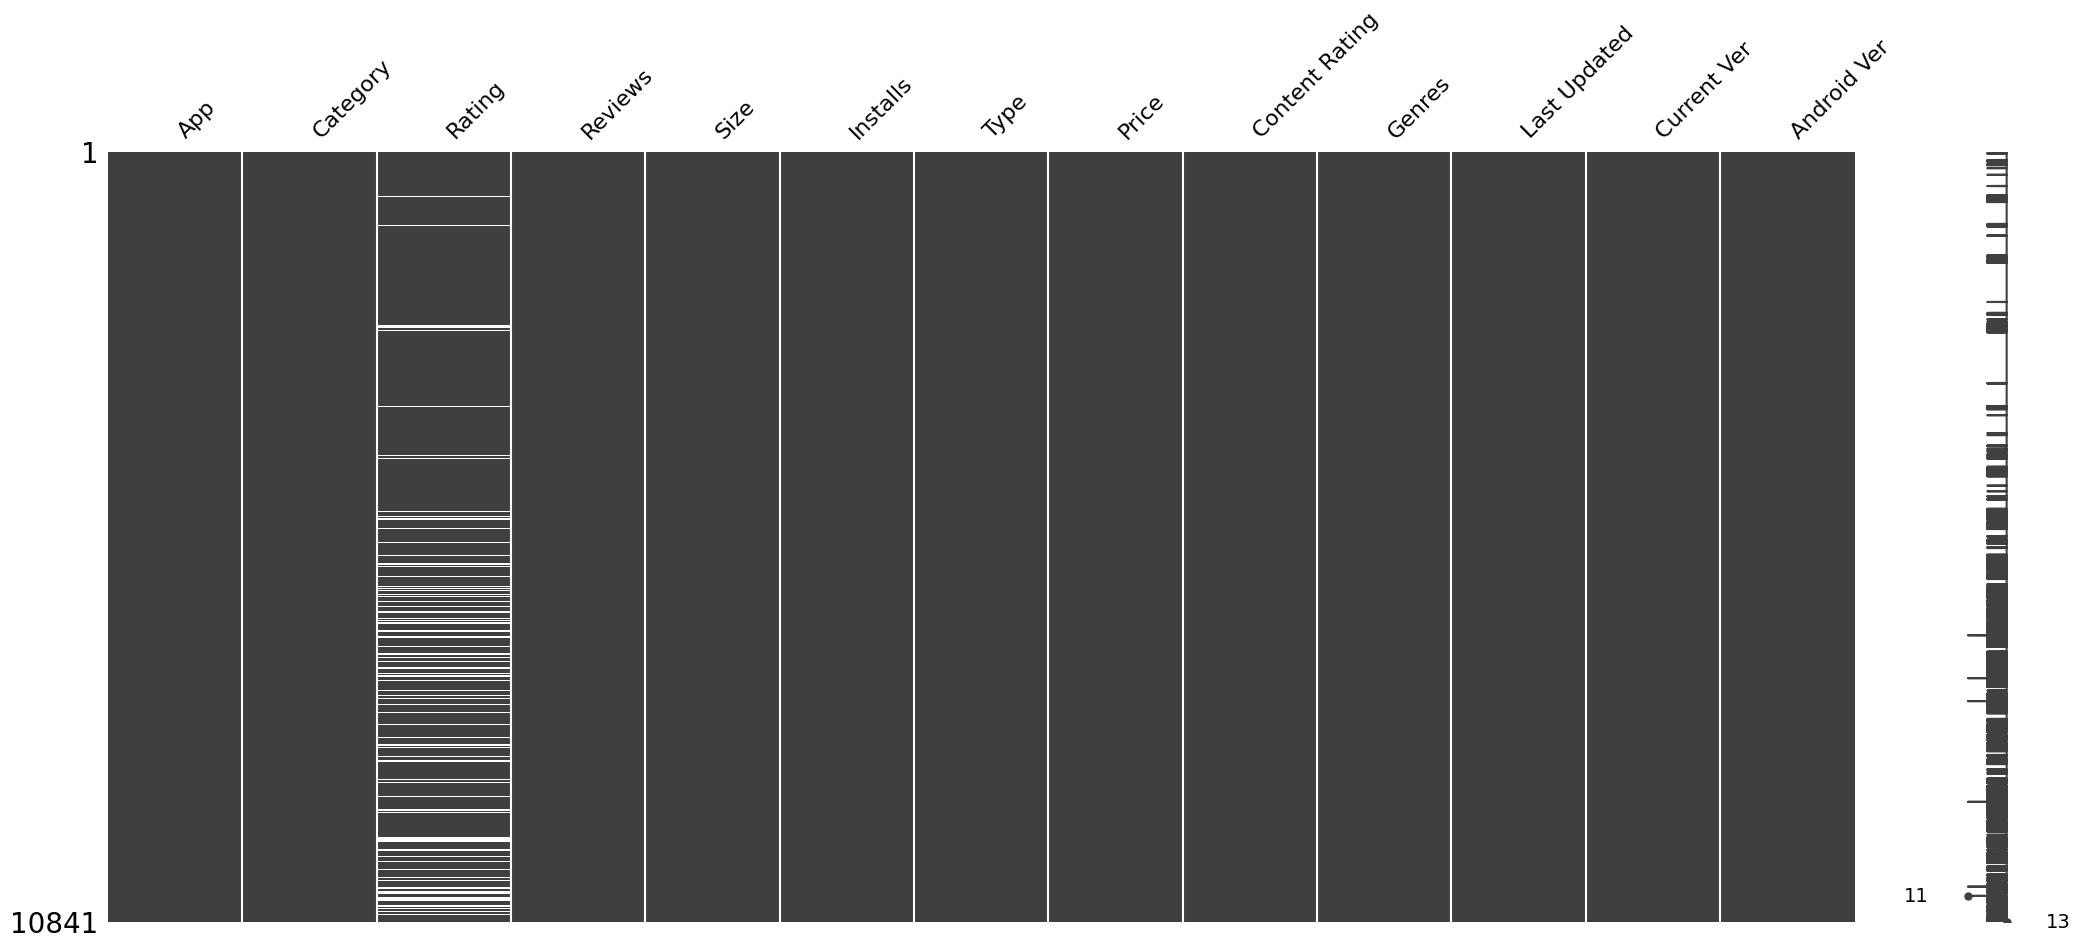

In [11]:
msno.matrix(data_df)
plt.show()


In [12]:
coloum_app_names = data_df["App"]

In [13]:
coloum_app_names[0]

'Photo Editor & Candy Camera & Grid & ScrapBook'

### 📌Handling Missing Ratings  
The following cell fills missing ratings with the average rating of the corresponding category.  
It also rounds existing ratings .


In [14]:
category_mean_rating = data_df.groupby("Category")["Rating"].mean()

In [15]:
print(category_mean_rating)

Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SPORTS                  4.223511
T

In [16]:
data_df["Rating"] = data_df.apply( lambda row: category_mean_rating[row["Category"]] if pd.isnull(row["Rating"]) else round(row["Rating"], 1),
    axis=1)

In [17]:
data_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9232,Encumbrance Certificate - (Obsolete),BUSINESS,3.900000,184,48k,"50,000+",Free,0,Everyone,Business,"August 12, 2014",1.1,2.3 and up
2489,Ovia Fertility Tracker & Ovulation Calculator,MEDICAL,4.800000,53747,13M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",Varies with device,4.3 and up
7981,CV (Curriculum Vitae / Resume) Maker,BUSINESS,4.121452,4,4.4M,"5,000+",Free,0,Everyone,Business,"December 27, 2017",1.1,4.0.3 and up
4514,Q-Ticketing,MAPS_AND_NAVIGATION,3.800000,114,19M,"10,000+",Free,0,Everyone,Maps & Navigation,"December 18, 2017",1.8.3111,4.3 and up
8041,Cathay Pacific,TRAVEL_AND_LOCAL,3.300000,4069,50M,"1,000,000+",Free,0,Everyone,Travel & Local,"July 25, 2018",6.6.1,4.3 and up
9959,Bolt - EV Charging Service,AUTO_AND_VEHICLES,3.000000,9,8.4M,100+,Free,0,Everyone,Auto & Vehicles,"March 23, 2018",2.2.0,5.0 and up
9162,SCRABBLE,GAME,3.900000,172281,50M,"5,000,000+",Free,0,Everyone,Word,"August 1, 2018",5.27.0.729,4.1 and up
3271,HTC Sense Input,TOOLS,3.400000,17030,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"May 12, 2017",Varies with device,Varies with device
4002,C Offline Tutorial,BOOKS_AND_REFERENCE,4.700000,88,4.2M,"1,000+",Free,0,Everyone,Books & Reference,"December 8, 2017",1.0.1,4.1 and up
9695,EP Mobile,MEDICAL,4.300000,267,2.3M,"50,000+",Free,0,Everyone,Medical,"July 8, 2018",2.18,4.0 and up


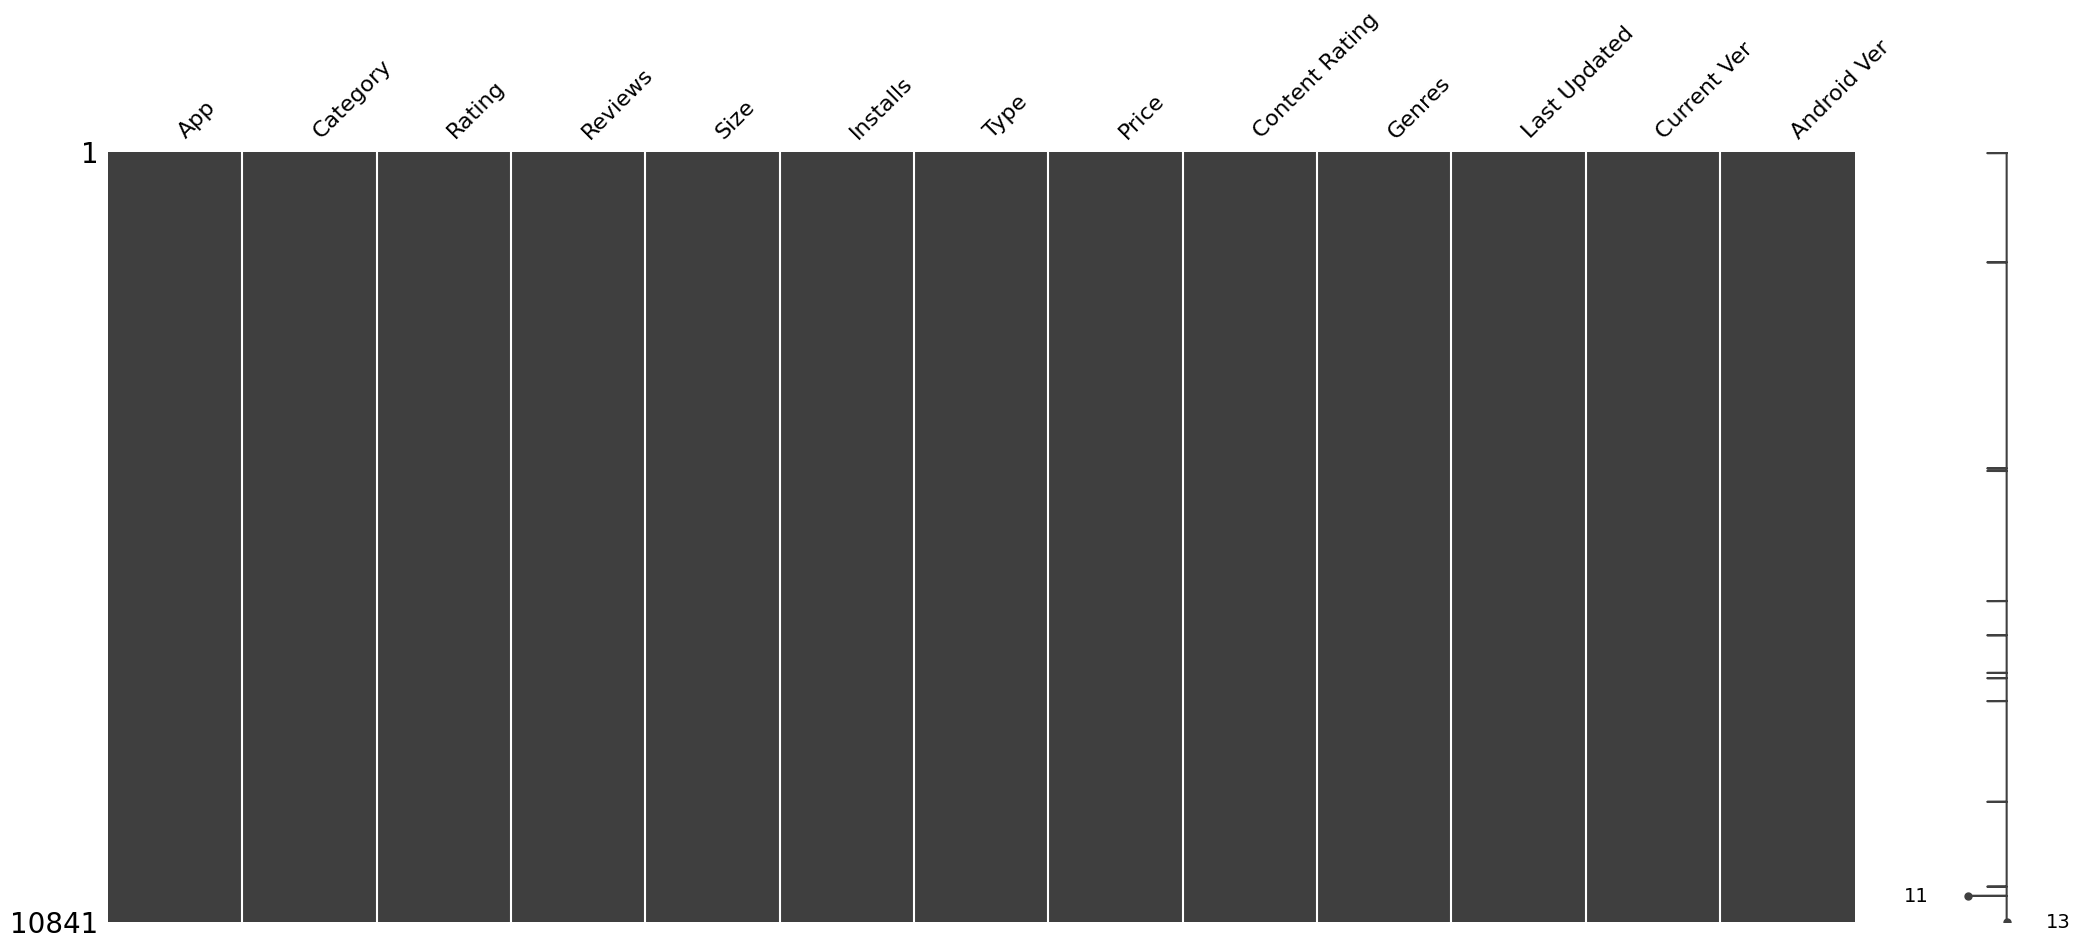

In [18]:
msno.matrix(data_df)
plt.show()

### Checking Missing Values  
The following cell displays the number of missing values in each column of the dataset.


In [19]:
data_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [20]:
data_df = data_df.dropna()

In [21]:
data_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 📌 Calculating Mean Rating per Category  Calculating Mean Rating per Category  
The following cell computes the average rating for each category and rounds it to **one decimal place**.


In [22]:
category_mean_rating = data_df.groupby("Category")["Rating"].mean().round(1)

In [23]:
print(category_mean_rating)

Category
ART_AND_DESIGN         4.4
AUTO_AND_VEHICLES      4.2
BEAUTY                 4.3
BOOKS_AND_REFERENCE    4.3
BUSINESS               4.1
COMICS                 4.2
COMMUNICATION          4.2
DATING                 4.0
EDUCATION              4.4
ENTERTAINMENT          4.1
EVENTS                 4.4
FAMILY                 4.2
FINANCE                4.1
FOOD_AND_DRINK         4.2
GAME                   4.3
HEALTH_AND_FITNESS     4.3
HOUSE_AND_HOME         4.2
LIBRARIES_AND_DEMO     4.2
LIFESTYLE              4.1
MAPS_AND_NAVIGATION    4.1
MEDICAL                4.2
NEWS_AND_MAGAZINES     4.1
PARENTING              4.3
PERSONALIZATION        4.3
PHOTOGRAPHY            4.2
PRODUCTIVITY           4.2
SHOPPING               4.3
SOCIAL                 4.3
SPORTS                 4.2
TOOLS                  4.0
TRAVEL_AND_LOCAL       4.1
VIDEO_PLAYERS          4.1
WEATHER                4.2
Name: Rating, dtype: float64


In [24]:
data_df["Rating"] = data_df.apply( lambda row: category_mean_rating[row["Category"]] if pd.isnull(row["Rating"]) else round(row["Rating"], 1),
    axis=1)

In [25]:
data_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8815,DS note,PRODUCTIVITY,3.9,2046,60M,"100,000+",Free,0,Everyone,Productivity,"June 11, 2018",1.10.1,4.4 and up
7439,CJ Wilson's ZoomZoomnation,PRODUCTIVITY,4.0,4,8.2M,500+,Free,0,Everyone,Productivity,"July 11, 2018",3.5.3,4.0.3 and up
6268,BI-LO,LIFESTYLE,3.5,43,30M,"10,000+",Free,0,Everyone,Lifestyle,"July 11, 2018",2.0.0,4.1 and up
4557,"Join R, Community Engagement",SOCIAL,4.7,144,12M,"1,000+",Free,0,Teen,Social,"January 31, 2017",1.0.12,4.0.3 and up
5709,LG AV REMOTE,TOOLS,3.4,2420,1.8M,"1,000,000+",Free,0,Everyone,Tools,"June 3, 2016",1.1.8,2.3.3 and up


# 📌 Size columns

### Cleaning the "Size" Column  
The following cell performs the following operations on the "Size" column:  
1. Displays column information.  
2. Replaces "Varies with device" with `None` (to handle missing values).  
3. Removes "M" and "k" from values to convert them into numerical format.  
4. Converts the column to a float data type.


In [27]:
data_df["Size"].info()

<class 'pandas.core.series.Series'>
Index: 10829 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype 
--------------  ----- 
10829 non-null  object
dtypes: object(1)
memory usage: 169.2+ KB


In [28]:
data_df["Size"] = data_df["Size"].replace("Varies with device", None)

In [29]:
data_df["Size"] = data_df["Size"].str.replace("M", "").str.replace("k", "").astype(float)

In [30]:
data_df["Size"].info()

<class 'pandas.core.series.Series'>
Index: 10829 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype  
--------------  -----  
9135 non-null   float64
dtypes: float64(1)
memory usage: 169.2 KB


In [31]:
data_df["Size"].sample(10)

5648    50.0
707      5.1
3488    14.0
3778     NaN
8673    39.0
9004     3.0
442      NaN
4571    26.0
3900     NaN
1716    67.0
Name: Size, dtype: float64

In [32]:
data_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.2,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 📌 Handling Missing Values in "Size" Column  
The following cell:  
1. Displays the number of missing values in the dataset.  
2. Fills missing values in the "Size" column with the median size.  


In [33]:
data_df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1694
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [34]:
data_df["Size"] = data_df["Size"].fillna(data_df["Size"].median())

In [35]:
data_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [36]:
data_df["Size"] = data_df["Size"].fillna(data_df["Size"].median())

In [37]:
data_df.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3500,Keeper: Free Password Manager & Secure Vault,PRODUCTIVITY,4.2,74146,32.0,"10,000,000+",Free,0,Everyone,Productivity,"July 16, 2018",12.1.0,4.4 and up
2232,Sago Mini Friends,FAMILY,4.4,13155,83.0,"1,000,000+",Free,0,Everyone,Education;Pretend Play,"June 16, 2016",1.3,4.0.3 and up
7431,Commission Manager,PRODUCTIVITY,3.2,12,2.2,"1,000+",Free,0,Everyone,Productivity,"March 26, 2015",1.0.0.0,2.3.3 and up
5973,Baby Connect (activity log),PARENTING,4.7,8343,8.3,"50,000+",Paid,$4.99,Everyone,Parenting,"July 10, 2018",6.3.16,4.0.3 and up
4789,X Home Bar - Home Bar Gesture Pro,TOOLS,4.0,88,2.0,"10,000+",Paid,$1.99,Everyone,Tools,"July 2, 2018",1.5,4.3 and up
2255,Muscle Trigger Point Anatomy,MEDICAL,4.4,1361,33.0,"50,000+",Paid,$2.99,Everyone,Medical,"July 17, 2018",2.4.4,4.0.3 and up
5766,Call of Duty®: Heroes,GAME,4.4,1604146,57.0,"10,000,000+",Free,0,Teen,Action,"June 27, 2018",4.8.0,4.1 and up
924,HBO NOW: Stream TV & Movies,ENTERTAINMENT,3.9,61201,15.0,"10,000,000+",Free,0,Teen,Entertainment,"July 19, 2018",Varies with device,Varies with device
7530,CL e-bank,FINANCE,4.0,210,3.7,"10,000+",Free,0,Everyone,Finance,"July 30, 2018",1.5.5,4.2 and up
5113,Ag-Pro Companies,BUSINESS,4.1,0,45.0,50+,Free,0,Everyone,Business,"March 6, 2018",2.3.0,4.4 and up


### 📌 Cleaning the "Installs" Column  
The following cell:  
1. Removes "+" and "," from the "Installs" column to convert it into a numerical format.  
2. Converts the column to a float data type.


In [42]:
data_df["Installs"] = data_df["Installs"].str.replace("[+,]", "", regex=True).astype(float)

In [43]:
data_df["Installs"].sample(10)

7973       10000.0
3389    10000000.0
5801       10000.0
5547      100000.0
3193     1000000.0
8250     5000000.0
4000    10000000.0
4509        5000.0
6092       50000.0
2449          10.0
Name: Installs, dtype: float64

### 📌 One-Hot Encoding for "Genres" Column  
The following cell:  
1. Splits the "Genres" column into multiple binary columns using one-hot encoding.  
2. Concatenates the new genre columns with the original dataset.  


In [47]:
value_counts = data_df["Genres"].value_counts()

In [48]:
value_counts

Genres
Tools                       840
Entertainment               622
Education                   548
Medical                     463
Business                    460
                           ... 
Role Playing;Brain Games      1
Strategy;Education            1
Racing;Pretend Play           1
Communication;Creativity      1
Strategy;Creativity           1
Name: count, Length: 119, dtype: int64

In [49]:
genres_dummies = data_df["Genres"].str.get_dummies(sep=";")
data_df = pd.concat([data_df, genres_dummies], axis=1)

In [50]:
(genres_dummies.head())

,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,...,0,0,0,0,0,0,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,...,0,0,0,0,0,0,0,0,0,0
10838,Parkinson Exercices FR,MEDICAL,4.2,3,9.5,1000.0,Free,0.0,Everyone,Medical,...,0,0,0,0,0,0,0,0,0,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,15.0,1000.0,Free,0.0,Mature 17+,Books & Reference,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data_df = data_df.drop(columns=['Genres'])

In [53]:
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,0


# 📌 convert columns


In [55]:
data_df = pd.get_dummies(data_df, columns=['Category', 'Type' ] , drop_first = True)

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_df['Content_Rating_Label'] = le.fit_transform(data_df['Content Rating'])
data_df = data_df.drop(columns=['Content Rating'])

In [57]:
#data_df = data_df.replace({True: 1, False: 0})


In [58]:
data_df.sample(5)

,App,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Android Ver,Action,...,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content_Rating_Label
2056,Duolingo: Learn Languages Free,4.7,6294400,15.0,100000000.0,0.00,"August 1, 2018",Varies with device,Varies with device,0,...,False,False,False,False,False,False,False,False,False,1
8582,Disciple Maker’s (DM) Lab,5.0,3,4.0,100.0,0.00,"August 1, 2018",1.0.5,4.4 and up,0,...,False,False,False,False,False,False,False,False,False,1
178,"Only 30 days in English, the guideline is guar...",4.6,1065,2.3,500000.0,0.00,"June 16, 2018",1.5,3.0 and up,0,...,False,False,False,False,False,False,False,False,False,1
2398,Journal Club: Medicine,4.8,216,15.0,10000.0,6.99,"June 17, 2017",Varies with device,Varies with device,0,...,False,False,False,False,False,False,False,False,True,1
8756,Dr. Parking 4,4.4,475369,13.0,50000000.0,0.00,"March 6, 2018",1.14,4.0.3 and up,0,...,False,False,False,False,False,False,False,False,False,1


### 📌  Handling Missing Values in "Current Ver" Column  
The following cell:  
1. Replaces "Varies with device" with `None` to mark it as missing.  
2. Counts the number of missing values in the "Current Ver" column.  
3. Fills missing values with the most common version (mode).  


In [59]:
data_df["Current Ver"] = data_df["Current Ver"].replace("Varies with device", None)

In [60]:
data_df["Current Ver"].isna().sum()

np.int64(1458)

In [61]:
most_common_rating = data_df['Current Ver'].mode()[0]
data_df['Current Ver'].fillna(most_common_rating, inplace=True)

C:\Users\dellg15\AppData\Local\Temp\ipykernel_136876\2630145623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Current Ver'].fillna(most_common_rating, inplace=True)


In [62]:
data_df

,App,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Android Ver,Action,...,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content_Rating_Label
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000.0,0.0,"January 7, 2018",1.0.0,4.0.3 and up,0,...,False,False,False,False,False,False,False,False,False,1
1,Coloring book moana,3.9,967,14.0,500000.0,0.0,"January 15, 2018",2.0.0,4.0.3 and up,0,...,False,False,False,False,False,False,False,False,False,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000.0,0.0,"August 1, 2018",1.2.4,4.0.3 and up,0,...,False,False,False,False,False,False,False,False,False,1
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000.0,0.0,"June 8, 2018",1.0,4.2 and up,0,...,False,False,False,False,False,False,False,False,False,4
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000.0,0.0,"June 20, 2018",1.1,4.4 and up,0,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,38,53.0,5000.0,0.0,"July 25, 2017",1.48,4.1 and up,0,...,False,False,False,False,False,False,False,False,False,1
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,3.6,100.0,0.0,"July 6, 2018",1.0,4.1 and up,0,...,False,False,False,False,False,False,False,False,False,1
10838,Parkinson Exercices FR,4.2,3,9.5,1000.0,0.0,"January 20, 2017",1.0,2.2 and up,0,...,False,False,False,False,False,False,False,False,False,1
10839,The SCP Foundation DB fr nn5n,4.5,114,15.0,1000.0,0.0,"January 19, 2015",1.0,Varies with device,0,...,False,False,False,False,False,False,False,False,False,3


In [63]:
data_df.isna().sum().sum()

np.int64(0)

# 📌 Last Update column

In [64]:
import pandas as pd

# إنشاء DataFrame كمثال
data_df = pd.DataFrame(data_df)

# تحويل العمود إلى تاريخ
data_df['Last Updated'] = pd.to_datetime(data_df['Last Updated'], errors='coerce')

# استخراج اليوم والشهر والسنة
data_df['Day'] = data_df['Last Updated'].dt.day
data_df['Month'] = data_df['Last Updated'].dt.month
data_df['Year'] = data_df['Last Updated'].dt.year

# عرض النتيجة
data_df.sample(5)


,App,Rating,Reviews,Size,Installs,Price,Last Updated,Current Ver,Android Ver,Action,...,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content_Rating_Label,Day,Month,Year
5455,Access Point Finder,4.0,22,2.5,10000.0,0.0,2016-09-06,1.0,3.0 and up,0,...,False,False,False,False,False,False,1,6,9,2016
2066,Drawing for Kids Learning Games for Toddlers a...,4.6,29436,43.0,1000000.0,0.0,2018-03-21,2.0.5.0,4.1 and up,0,...,False,False,False,False,False,False,1,21,3,2018
8816,DS cam,3.6,3227,35.0,500000.0,0.0,2018-07-26,3.0.1,4.1 and up,0,...,False,False,False,False,False,False,1,26,7,2018
9315,eG Monitor,4.6,8,7.5,100.0,0.0,2018-07-27,2.0.7,4.1 and up,0,...,False,False,False,False,False,False,1,27,7,2018
8499,cluster.dk,4.2,49,1.1,1000.0,0.0,2013-06-25,1.0.2,2.3 and up,0,...,False,False,False,False,False,False,1,25,6,2013


In [65]:
data_df = data_df.drop(columns=['Last Updated'])

### 📌Cleaning the "Android Ver" Column  
The following cell:  
1. Replaces "Varies with device" with `None` to mark it as missing.  
2. Extracts only the numeric part of the Android version using regex.  
3. Converts the extracted values to float for numerical analysis.  


In [66]:
data_df["Android Ver"] = data_df["Android Ver"].replace("Varies with device", None)


In [67]:
import pandas as pd
data_df = pd.DataFrame(data_df)

data_df['Android Ver'] = data_df['Android Ver'].str.extract(r'(\d+\.?\d*)')
data_df['Android Ver'] = pd.to_numeric(data_df['Android Ver'], errors='coerce')

In [68]:
data_df.sample(5)

,App,Rating,Reviews,Size,Installs,Price,Current Ver,Android Ver,Action,Action & Adventure,...,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content_Rating_Label,Day,Month,Year
3265,Gboard - the Google Keyboard,4.2,1859115,15.0,5.000000e+08,0.0,1.0,NaN,0,0,...,False,True,False,False,False,False,1,31,7,2018
5943,Poteau BA,4.2,3,4.0,5.000000e+02,0.0,1.0.2,5.0,0,0,...,False,False,False,False,False,False,1,16,7,2017
7998,IZ2UUF Morse Koch CW,4.6,649,837.0,5.000000e+04,0.0,1.0.013,2.1,0,0,...,False,False,False,False,False,False,1,8,8,2013
740,Quizlet: Learn Languages & Vocab with Flashcards,4.6,211856,15.0,1.000000e+07,0.0,1.0,NaN,0,0,...,False,False,False,False,False,False,1,1,8,2018
4153,Hangouts,4.0,3419464,15.0,1.000000e+09,0.0,1.0,NaN,0,0,...,False,False,False,False,False,False,1,21,7,2018


In [69]:
data_df.isna().sum().sum()

np.int64(1361)

# -----------------------------------------------------------

### 📌Filling Missing Values in "Android Ver" Column  
The following cell fills missing values in the "Android Ver" column with the most common version (mode).  


### Counting Unique Values in "Android Ver" Column  
The following cell counts the occurrences of each unique Android version in the dataset.  


In [ ]:

value = data_df["Android Ver"].value_counts()

In [72]:
data_df.isna().sum().sum()

np.int64(1361)

In [73]:
most_common_version = data_df['Android Ver'].mode()[0]  
data_df['Android Ver'].fillna(most_common_version, inplace=True)

C:\Users\dellg15\AppData\Local\Temp\ipykernel_136876\2621255459.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Android Ver'].fillna(most_common_version, inplace=True)


In [74]:
data_df.columns

Index(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Current Ver',
       'Android Ver', 'Action', 'Action & Adventure', 'Adventure', 'Arcade',
       'Art & Design', 'Auto & Vehicles', 'Beauty', 'Board',
       'Books & Reference', 'Brain Games', 'Business', 'Card', 'Casino',
       'Casual', 'Comics', 'Communication', 'Creativity', 'Dating',
       'Education', 'Educational', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Maps & Navigation', 'Medical', 'Music', 'Music & Audio',
       'Music & Video', 'News & Magazines', 'Parenting', 'Personalization',
       'Photography', 'Pretend Play', 'Productivity', 'Puzzle', 'Racing',
       'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports',
       'Strategy', 'Tools', 'Travel & Local', 'Trivia',
       'Video Players & Editors', 'Weather', 'Word',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_R

# ======================Outliers=================================== 

## Outlier for Rating column

<Axes: xlabel='Rating'>

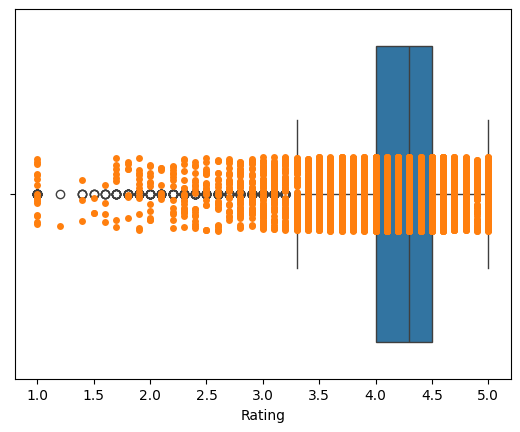

In [75]:
sns.boxplot(x='Rating' ,  data =data_df )
sns.stripplot(x="Rating", data =data_df )

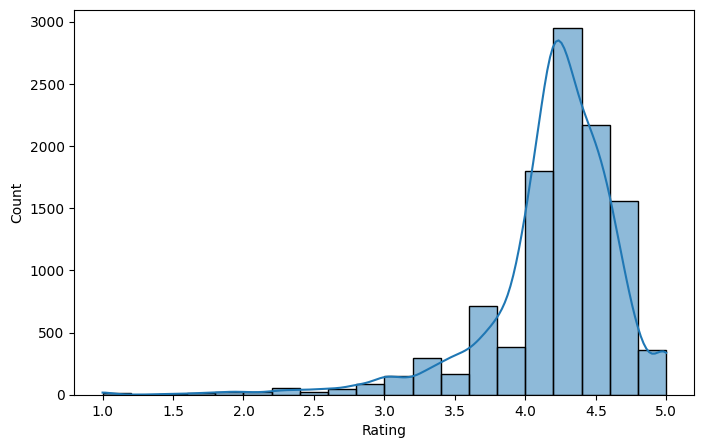

In [76]:
plt.figure(figsize=(8, 5))
sns.histplot(data_df["Rating"], bins=20, kde=True)
plt.show()


# 📌 Conclusions:

The user is referring to the following observations:  

- **The distribution is skewed towards higher values**, with most ratings concentrated between 4.0 and 5.0.  
- **A large number of outliers** are present, especially in the lower rating range (below 3.0).  
- **The ratings are mostly clustered around high values**, indicating that most apps receive good ratings.

# -----------------------------------------------------------------------------------------------

## Outlier for Reviews column

<Axes: xlabel='Reviews'>

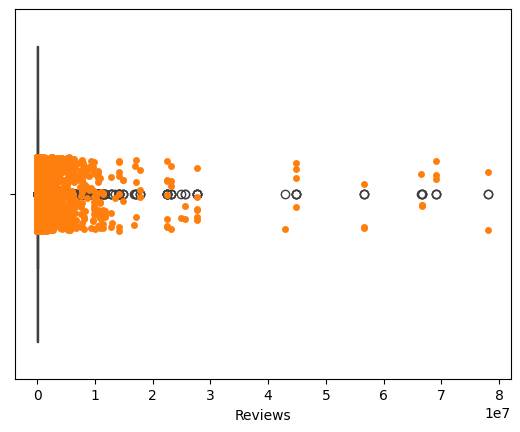

In [77]:
sns.boxplot(x='Reviews' ,  data =data_df )
sns.stripplot(x='Reviews', data =data_df )

<Axes: xlabel='Size'>

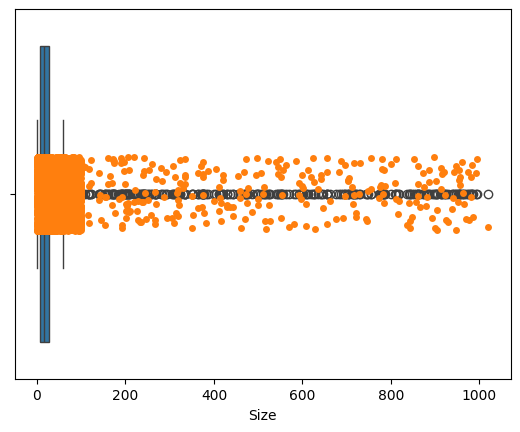

In [78]:
sns.boxplot(x='Size' ,  data =data_df )
sns.stripplot(x='Size', data =data_df )

### Visualizing and Categorizing "Installs"  
The following cell:  
1. Creates a box plot and a strip plot to visualize the distribution of the "Installs" column.  
2. Defines a function to categorize install counts into five levels: Very Low, Low, Medium, High, and Very High.  
3. Applies the function to create a new categorical column for "Installs".  
4. Displays a random sample of 5 rows with the new categories.  


<Axes: xlabel='Installs'>

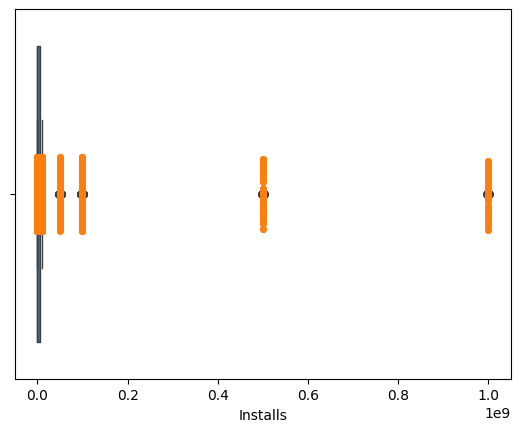

In [79]:
sns.boxplot(x='Installs' ,  data =data_df )
sns.stripplot(x="Installs", data =data_df )

In [80]:
def categorize_installs(value):
    if 0 <= value < 10000:
        return "Very Low"
    elif 10_000 <= value < 100000:
        return "Low"
    elif 100_000 <= value < 1000000:
        return "Medium"
    elif 1_000_000 <= value < 10000000:
        return "High"
    elif value >= 10000000:
        return "Very High"
    

# Apply the function to create a new category column
data_df['Installs'] = data_df['Installs'].apply(categorize_installs)

# Display categorized values
data_df.sample(5)

,App,Rating,Reviews,Size,Installs,Price,Current Ver,Android Ver,Action,Action & Adventure,...,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content_Rating_Label,Day,Month,Year
1581,Kawaii Easy Drawing : How to draw Step by Step,4.3,34327,8.1,High,0.00,2.5.1,4.0,0,0,...,False,False,False,False,False,False,1,17,7,2018
1121,Everlance: Free Mileage Log,4.7,7514,14.0,Medium,0.00,1.9.9.9.3,4.4,0,0,...,False,False,False,False,False,False,1,31,7,2018
1924,Zombie Catchers,4.7,990663,75.0,Very High,0.00,1.0.27,4.1,1,0,...,False,False,False,False,False,False,1,24,5,2018
6496,Basket Manager 2017 Pro,4.7,163,4.6,Very Low,0.99,3.9,4.1,0,0,...,True,False,False,False,False,True,1,6,10,2017
10041,Advanced EX for HYUNDAI,2.7,168,170.0,Very Low,4.99,1.10,1.6,0,0,...,False,True,False,False,False,True,1,14,3,2015


In [81]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

genres_dummies = data_df["Installs"].str.get_dummies(sep=";")
data_df = pd.concat([data_df, genres_dummies], axis=1)
data_df.drop(columns=['Installs'], inplace=True, errors='ignore')

In [82]:
data_df["Low"]

0        1
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Low, Length: 10829, dtype: int64

### 📌 Standardizing Numeric Columns  
The following cell scales the numeric features using **StandardScaler**, which transforms the data to have a mean of 0 and a standard deviation of 1.  


In [83]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ["Rating", "Reviews", "Size", "Android Ver"]  
data_df[numeric_cols] = StandardScaler().fit_transform(data_df[numeric_cols])



In [84]:
data_df

,App,Rating,Reviews,Size,Price,Current Ver,Android Ver,Action,Action & Adventure,Adventure,...,Type_Paid,Content_Rating_Label,Day,Month,Year,High,Low,Medium,Very High,Very Low
0,Photo Editor & Candy Camera & Grid & ScrapBook,-0.187255,-0.151735,-0.159551,0.0,1.0.0,0.147972,0,0,0,...,False,1,7,1,2018,0,1,0,0,0
1,Coloring book moana,-0.603682,-0.151459,-0.214514,0.0,2.0.0,0.147972,0,0,0,...,False,1,15,1,2018,0,0,1,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.062024,-0.121913,-0.272776,0.0,1.2.4,0.147972,0,0,0,...,False,1,1,8,2018,1,0,0,0,0
3,Sketch - Draw & Paint,0.645597,-0.078167,-0.093594,0.0,1.0,0.403108,0,0,0,...,False,4,8,6,2018,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,0.229171,-0.151459,-0.337633,0.0,1.1,0.658245,0,0,0,...,False,1,20,6,2018,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,0.645597,-0.151776,0.214202,0.0,1.48,0.275540,0,0,0,...,False,1,25,7,2017,0,0,0,0,1
10837,Fr. Mike Schmitz Audio Teachings,1.686663,-0.151788,-0.328839,0.0,1.0,0.275540,0,0,0,...,False,1,6,7,2018,0,0,0,0,1
10838,Parkinson Exercices FR,0.020958,-0.151788,-0.263982,0.0,1.0,-2.148257,0,0,0,...,False,1,20,1,2017,0,0,0,0,1
10839,The SCP Foundation DB fr nn5n,0.645597,-0.151750,-0.203522,0.0,1.0,0.147972,0,0,0,...,False,3,19,1,2015,0,0,0,0,1


In [85]:
data_df = data_df.replace({True: 1, False: 0})

C:\Users\dellg15\AppData\Local\Temp\ipykernel_136876\1222873883.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df = data_df.replace({True: 1, False: 0})


In [86]:
data_df

,App,Rating,Reviews,Size,Price,Current Ver,Android Ver,Action,Action & Adventure,Adventure,...,Type_Paid,Content_Rating_Label,Day,Month,Year,High,Low,Medium,Very High,Very Low
0,Photo Editor & Candy Camera & Grid & ScrapBook,-0.187255,-0.151735,-0.159551,0.0,1.0.0,0.147972,0,0,0,...,0,1,7,1,2018,0,1,0,0,0
1,Coloring book moana,-0.603682,-0.151459,-0.214514,0.0,2.0.0,0.147972,0,0,0,...,0,1,15,1,2018,0,0,1,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",1.062024,-0.121913,-0.272776,0.0,1.2.4,0.147972,0,0,0,...,0,1,1,8,2018,1,0,0,0,0
3,Sketch - Draw & Paint,0.645597,-0.078167,-0.093594,0.0,1.0,0.403108,0,0,0,...,0,4,8,6,2018,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,0.229171,-0.151459,-0.337633,0.0,1.1,0.658245,0,0,0,...,0,1,20,6,2018,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,0.645597,-0.151776,0.214202,0.0,1.48,0.275540,0,0,0,...,0,1,25,7,2017,0,0,0,0,1
10837,Fr. Mike Schmitz Audio Teachings,1.686663,-0.151788,-0.328839,0.0,1.0,0.275540,0,0,0,...,0,1,6,7,2018,0,0,0,0,1
10838,Parkinson Exercices FR,0.020958,-0.151788,-0.263982,0.0,1.0,-2.148257,0,0,0,...,0,1,20,1,2017,0,0,0,0,1
10839,The SCP Foundation DB fr nn5n,0.645597,-0.151750,-0.203522,0.0,1.0,0.147972,0,0,0,...,0,3,19,1,2015,0,0,0,0,1


In [87]:
data_df = data_df.drop(columns=['App'])

In [88]:
data_df.sample(5)

,Rating,Reviews,Size,Price,Current Ver,Android Ver,Action,Action & Adventure,Adventure,Arcade,...,Type_Paid,Content_Rating_Label,Day,Month,Year,High,Low,Medium,Very High,Very Low
3390,0.645597,-0.141819,-0.332136,0.0,40.0,0.147972,0,0,0,0,...,0,1,10,12,2017,1,0,0,0,0
10152,-2.061174,-0.151760,0.060304,0.0,2.5.186032,0.658245,0,0,0,0,...,0,1,17,5,2018,0,1,0,0,0
3861,0.229171,-0.151366,-0.214514,0.0,2.4.1,0.275540,0,0,0,0,...,0,1,2,11,2017,0,0,1,0,0
8985,-0.187255,-0.151789,-0.315647,0.0,1.0.5,1.423654,0,0,0,0,...,0,2,13,7,2018,0,1,0,0,0
791,0.020958,-0.128064,-0.203522,0.0,1.0,0.147972,0,0,0,0,...,0,1,19,7,2018,0,0,0,1,0


## ✅Now the data is ready to be fed into the model, and it is clean and optimized📌.

# 📌 Analytical Questions

## 1️⃣ Which genre has the highest number of apps?

In [26]:
top_genre = data_df["Genres"].value_counts().idxmax()
print(f"Most common genre: {top_genre}")


Most common genre: Tools


## 2️⃣ What is Google’s estimated revenue from apps with 5,000,000+ installs?

In [39]:
high_install_apps = data_df[data_df["Installs"] == "Very High"]
total_revenue = (high_install_apps["Price"] * high_install_apps["Installs"].astype(float)).sum()
google_revenue = total_revenue * 0.30
print(f"Google's estimated revenue: ${google_revenue:,.2f}")


Google's estimated revenue: $0.00


## 3️⃣	What are the maximum and minimum sizes of free vs. paid apps?

In [40]:
size_stats = data_df.groupby("Type")["Size"].agg(["min", "max"])
print(size_stats)  4

      min     max
Type             
Free  1.0   994.0
Paid  1.0  1020.0


## 4️⃣ Is there a correlation between an app’s rating, number of reviews, size, and its price?

In [41]:
data_df["Price"] = data_df["Price"].astype(str)
data_df["Price"] = data_df["Price"].str.replace("$", "", regex=False).astype(float)
correlation_matrix = data_df[["Rating", "Reviews", "Size", "Price"]].corr()

print(correlation_matrix)



           Rating   Reviews      Size     Price
Rating   1.000000  0.068432 -0.021692 -0.020569
Reviews  0.068432  1.000000  0.003765 -0.009674
Size    -0.021692  0.003765  1.000000  0.016526
Price   -0.020569 -0.009674  0.016526  1.000000


## 5️⃣ What is the average price of apps, grouped by genre and number of installs?

In [46]:
avg_price = data_df.groupby(["Genres", "Installs"])["Price"].mean()
print(avg_price)


Genres  Installs  
Action  10.0          0.000000
        50.0          0.663333
        100.0         1.096000
        500.0         0.000000
        1000.0        0.372500
                        ...   
Word    100000.0      0.000000
        1000000.0     0.000000
        5000000.0     0.000000
        10000000.0    0.000000
        50000000.0    0.000000
Name: Price, Length: 920, dtype: float64


## 6️⃣ What are the top 5 most expensive apps with a perfect rating (5)?

In [54]:
top_expensive_perfect = data_df[data_df["Rating"] == 5].nlargest(5, "Price")
top_expensive_perfect[["App", "Price"]]  



,App,Price
5489,AP Art History Flashcards,29.99
7477,USMLE Step 2 CK Flashcards,19.99
5246,Hey AJ! It's Bedtime!,4.99
5482,meStudying: AP English Lit,4.99
7204,TI-84 CE Graphing Calculator Manual TI 84,4.99


## 7️⃣ How many apps have received more than 50K reviews?

In [70]:
data_df["Reviews"] = pd.to_numeric(data_df["Reviews"], errors="coerce")

num_apps_50k_reviews = (data_df["Reviews"] > 50000).sum()
print(f"Number of apps with more than 50K reviews: {num_apps_50k_reviews}")


Number of apps with more than 50K reviews: 2782
